In [1]:
import pandas as pd
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pima = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')
pima.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


**Задание 1.**

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [3]:
pima.isnull().sum() ####метод isnull заменяет все ячейки на true и false

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

**Задание 2.**

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [4]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

In [5]:
discrete_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','Age']
const_features = ['BMI', 'DiabetesPedigreeFunction']

In [6]:
pima[const_features] = pima[const_features].fillna(pima[const_features].mean())
pima[discrete_features] = pima[discrete_features].fillna(pima[discrete_features].median())

In [7]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1



**Задание 3.**

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [8]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Задание 4.**

У скольких женщин старше 50 лет обнаружен диабет?

In [9]:

#### отфильтруем таблицу по возрасту
print('Количество женщин с диабетом старше 50 лет = ', pima[ (pima['Age']>50) & (pima['Class']==1) ].shape[0])

Количество женщин с диабетом старше 50 лет =  38


**Задание 5.**

Найдите трех женщин с наибольшим числом беременностей.

In [10]:
pima.sort_values(by = ['Pregnancies'], ascending = False).head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


**Задание 6.**

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [11]:
pima[(pima['Age']<=40) & (pima['Age']>=30) & (pima['Pregnancies']>=3)].shape[0]

142

**Задание 7.**

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [12]:
(pima[pima['BloodPressure'].isin(range(80,90))].shape[0]/ pima.shape[0])*100, 'процентов'

(18.880208333333336, 'процентов')

**Задание 8.**

Считается, что BMI >= 30 - это признак ожирения. У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [13]:
pima[(pima['BMI']>=30) & (pima['BloodPressure']>pima['BloodPressure'].mean())].shape[0]

251

**Задание 9.**

Сравните средние значения для признаков Glucose, BloodPressure, Insulin среди тех, у кого обнаружен диабет, и тех, у кого его нет.

In [14]:
pima.groupby('Class')[['Glucose', 'BloodPressure', 'Insulin']].mean()

,Glucose,BloodPressure,Insulin
Class,,,
0,110.682000,70.920000,127.792000
1,142.130597,75.123134,164.701493


Значения показывают, что в среднем люди с диабетом имеют более высокие уровни глюкозы в крови, артериального давления и инсулина по сравнению с теми, у кого диабета нет.

**Задание 10.**

Постройте гистограммы для любых двух количественных признаков.

array([[<Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'Glucose'}>]], dtype=object)

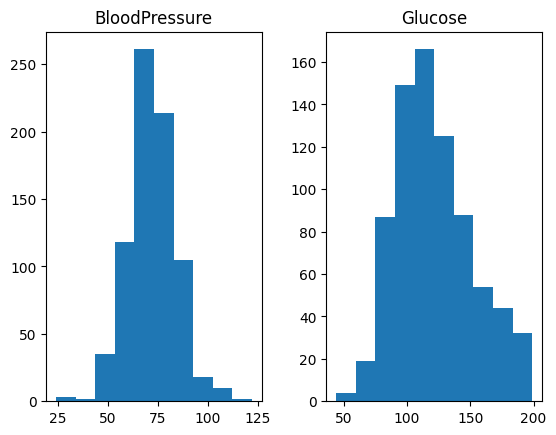

In [15]:
pima[['BloodPressure','Glucose']].hist(grid=False)

**Задание 12.**

Постройте распределения для признаков Age и BloodPressure и сравните оба распределения с нормальным.

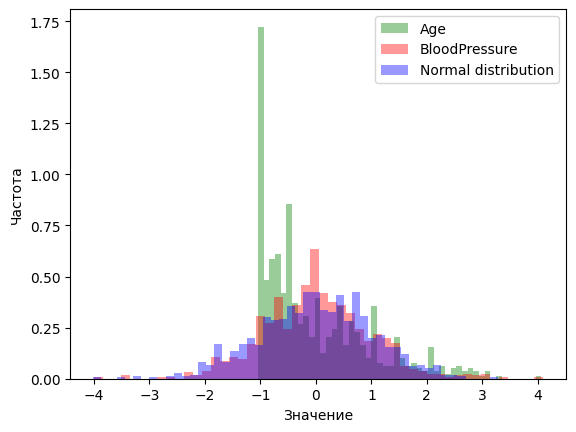

In [16]:
# нормализуем Age и BloodPressure
age_mean = pima.Age.mean()
age_std = pima.Age.std()
blood_pressure_mean = pima.BloodPressure.mean()
blood_pressure_std = pima.BloodPressure.std()

pima['Age_standardized'] = (pima.Age - age_mean) / age_std
pima['BloodPressure_standardized'] = (pima.BloodPressure - blood_pressure_mean) / blood_pressure_std

# Генерируем случайные данные с нормальным распределением
norm_dist = np.random.normal(0, 1, 1000)


# Строим гистограмму с новыми стандартизированными данными

plt.hist(pima['Age_standardized'], bins=50, density=True, alpha=0.4, color='green', label='Age')
plt.hist(pima['BloodPressure_standardized'], bins=50, density=True, alpha=0.4, color='red', label='BloodPressure')
plt.hist(norm_dist, bins=50, density=True, alpha=0.4, color='blue', label='Normal distribution')

plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()

plt.show()


**Задание 13.**

Постройте следующий график: доля больных диабетом в зависимости от числа беременностей.

In [17]:
rate_of_pregnancies_with_diabetes = pima[['Pregnancies','Class']].groupby('Pregnancies').agg(['sum','count'])


In [18]:
list_rate_p_of_d = rate_of_pregnancies_with_diabetes[('Class','sum')]/rate_of_pregnancies_with_diabetes[('Class','count')].values.tolist()


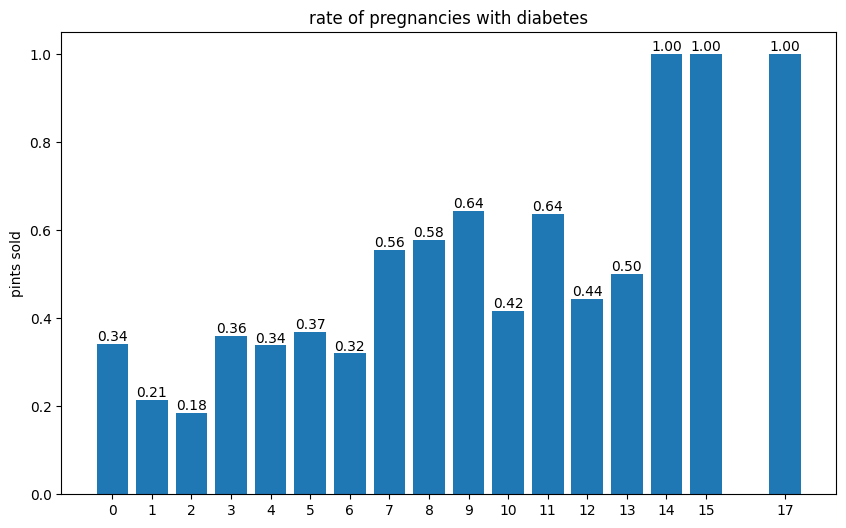

In [19]:
preg_num = rate_of_pregnancies_with_diabetes.index.tolist()
rate_values = list_rate_p_of_d

fig, ax = plt.subplots(figsize=(10, 6))
bar_container = ax.bar(preg_num, rate_values)
ax.set(ylabel='pints sold', title='rate of pregnancies with diabetes')
ax.bar_label(bar_container, fmt='{:.2f}')
ax.set_xticks(preg_num)
plt.show()

**Задание 14.**

Добавьте новый бинарный признак:

``wasPregnant``
 {0,1} - была женщина беременна (1) или нет (0)

In [20]:
pima['wasPregnant']=np.where(pima['Pregnancies']>0,1,0)

**Задание 15.**

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [24]:
print('Доля больных диабетом среди женщин которые были беременны = ',pima[pima['wasPregnant']==1]['Class'].sum() / pima[pima['wasPregnant']==1]['Class'].count())
print('Доля больных диабетом среди женщин которые не были беременны = ',pima[pima['wasPregnant']==0]['Class'].sum() / pima[pima['wasPregnant']==0]['Class'].count())

Доля больных диабетом среди женщин которые были беременны =  0.350076103500761
Доля больных диабетом среди женщин которые не были беременны =  0.34234234234234234


In [22]:
pima.groupby('wasPregnant')['Class'].value_counts(normalize=True)

wasPregnant  Class
0            0        0.657658
             1        0.342342
1            0        0.649924
             1        0.350076
Name: proportion, dtype: float64

**Задание 16.**

Добавьте новый категориальный признак bodyType на основе столбца BMI:

BMI Categories:

Underweight = <18.5

Normal weight = 18.5–24.9

Overweight = 25–29.9

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [25]:
pima['bodyType'] = pd.cut(pima['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'], right=False)


**Задание 17.**

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [26]:
healthy_women = pima[(pima['bodyType']=='Normal weight') & (pima['BloodPressure'].isin(range(80,90)))]
print(healthy_women['Class'].sum()/healthy_women['Class'].count() * 100, 'процентов "здоровых" женщин больны диабетом')

10.0 процентов "здоровых" женщин больны диабетом


# Датасет 2

In [27]:
babies = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/babies%20names/babies_all.txt', index_col=0)

In [28]:
babies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1690784 entries, 0 to 33837
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   number  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 64.5+ MB


Задание 1.
Исследуйте набор данных babies. Ответьте на вопросы.

Какие годы включает датасет

Какое имя в датасете находится по индексом 121?

Cколько всего родилось детей по имени 'Aaron' за все время?

Насколько больше за все время родилось мальчиков чем девочек?

Cколько мальчиков родилось в 2010?

Сколько в датасете девочек по имени John?

In [ ]:
babies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690784 entries, 0 to 33837
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   number  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 64.5+ MB


In [ ]:
babies.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
# 1.
print('Какие годы включает датасет? Ответ:')
print('года в датасете:',babies['year'].unique())
print(f'Минимальный год - {babies.year.min()}, максимальный - {babies.year.max()}')

Какие годы включает датасет? Ответ:
года в датасете: [1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893
 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907
 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921
 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010]
Минимальный год - 1880, максимальный - 2010


In [ ]:
#2.
print('Какое имя в датасете находится по индексом 121?Ответ:',babies.iloc[121:122,:]['name'].values[0])
babies.iloc[121:122,:]


Какое имя в датасете находится по индексом 121?Ответ: Ann


,name,sex,number,year
121,Ann,F,131,1880


In [ ]:
#3.
total_aaron = babies[babies['name'] == 'Aaron']['number'].sum()
print('Cколько всего родилось детей по имени Aaron за все время? Ответ: ',total_aaron, 'детей')

Cколько всего родилось детей по имени Aaron за все время? Ответ:  527668 детей


In [ ]:
#4.
total_boys = babies[babies['sex'] == 'M']['number'].sum()
total_girls = babies[babies['sex'] == 'F']['number'].sum()
difference_boys_girls = total_boys - total_girls
print('Насколько больше за все время родилось мальчиков чем девочек?. Ответ: на ',difference_boys_girls,'детей')

Насколько больше за все время родилось мальчиков чем девочек?. Ответ: на  2422447 детей


In [ ]:
# 5.
boys_2010 = babies[(babies['year'] == 2010) & (babies['sex'] == 'M')]['number'].sum()

# 6.
girls_named_john = babies[(babies['name'] == 'John') & (babies['sex'] == 'F')]['number'].sum()

print('Cколько мальчиков родилось в 2010? Ответ:',boys_2010)
print('Сколько в датасете девочек по имени John? Ответ:', girls_named_john)

Cколько мальчиков родилось в 2010? Ответ: 1898382
Сколько в датасете девочек по имени John? Ответ: 21578


## Задание 2


<ipython-input-33-a47ed1ca58f7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = babies.groupby(['year', 'sex']).sum().reset_index()


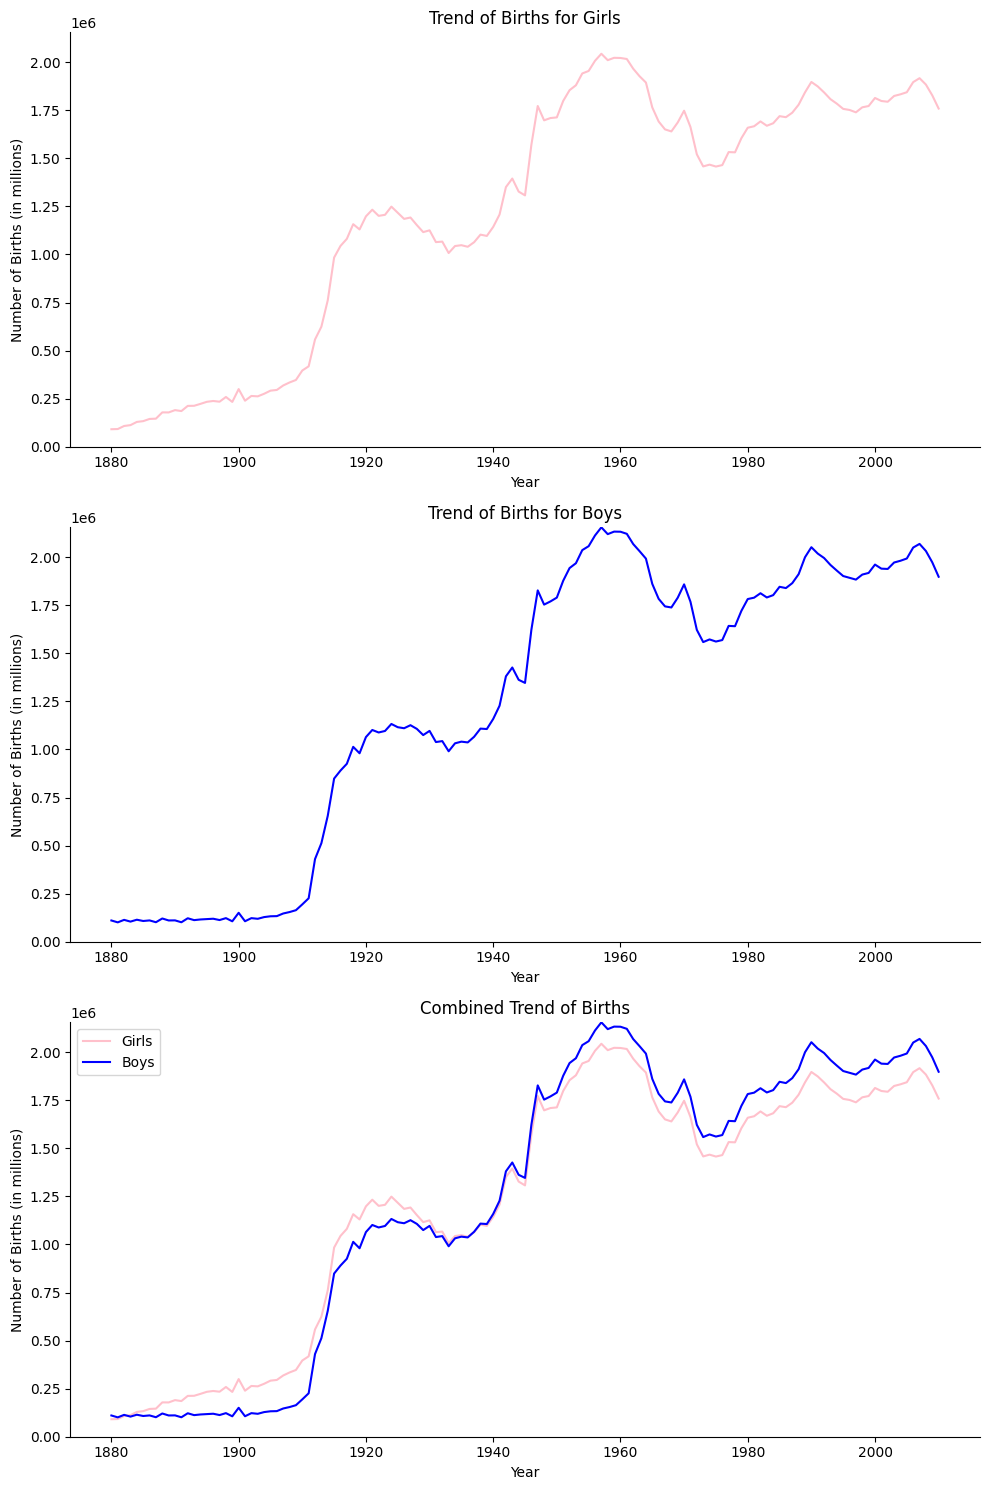

In [ ]:
grouped = babies.groupby(['year', 'sex']).sum().reset_index()

baby_girls = grouped[grouped['sex'] == 'F']
baby_boys = grouped[grouped['sex'] == 'M']


fig, axes = plt.subplots(3, 1, figsize=(10, 15))

axes[0].plot(baby_girls['year'], baby_girls['number'], color='pink')
axes[0].set_title('Trend of Births for Girls')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_ylabel('Number of Births (in millions)')
axes[0].set_xlabel('Year')

axes[1].plot(baby_boys['year'], baby_boys['number'], color='blue')
axes[1].set_title('Trend of Births for Boys')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_ylabel('Number of Births (in millions)')
axes[1].set_xlabel('Year')

axes[2].plot(baby_girls['year'], baby_girls['number'], color='pink', label='Girls')
axes[2].plot(baby_boys['year'], baby_boys['number'], color='blue', label='Boys')
axes[2].set_title('Combined Trend of Births')
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].legend()
axes[2].set_ylabel('Number of Births (in millions)')
axes[2].set_xlabel('Year')


ymax = max(baby_girls['number'].max(), baby_boys['number'].max())
for ax in axes:
    ax.set_ylim(0, ymax)

plt.tight_layout()
plt.show()

# Тренд рождаемости девочек
* График показывает количество рождений девочек с 1880 по начало 2000-х годов.
* Наблюдается общий рост количества рождений с 1880 года до примерно 1920 года.
* После небольшого спада в 1920-е годы резко возрастает пик примерно в середине 1950-х годов.
* После 1950-х годов на графике видны колебания, с заметным снижением около 1970-х годов и последующим восстановлением.
* Тренд с 1980-х годов и далее показывает меньшие колебания с небольшим нисходящим трендом в начале 2000-х годов.

# Тренд рождаемости мальчиков
* Этот график отображает количество рождений мальчиков за тот же период, что и график девочек.
* Узор схож с узором девочек, с постоянным увеличением с 1880 года до примерно 1920 года.
* Значительное увеличение числа рождений, достигающее пика в середине 1950-х, более выражено, чем на графике девочек.
* Тренд показывает некоторую волатильность после 1950-х годов с заметными пиками и спадами.
* После 1970-х годов количество рождений стабилизируется, с меньшими колебаниями, чем в предыдущие десятилетия, заканчиваясь мягким спадом к началу 2000-х годов.

# Общий тренд рождаемости
* Третий график сочетает в себе тренды как для девочек (розовая линия), так и для мальчиков (синяя линия) на одном графике для сравнения.
* Оба тренда показывают очень похожий образец со временем, причем количество рождений мальчиков последовательно выше, чем у девочек.
* Пики и впадины для обоих полов тесно совпадают, с наивысшим пиком для обоих в середине 1950-х.
* Спад после 1950-х и паттерн восстановления также очень близки.
* В начале 2000-х годов наблюдается сближение трендов, с уменьшением разрыва между рождаемостью мальчиков и девочек.


# Задание 3

<ipython-input-34-3b1878f8c25a>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  babies_top_names[name] = babies[babies['name'] == name].groupby('year').sum().reset_index()
<ipython-input-34-3b1878f8c25a>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  babies_top_names[name] = babies[babies['name'] == name].groupby('year').sum().reset_index()
<ipython-input-34-3b1878f8c25a>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the functi

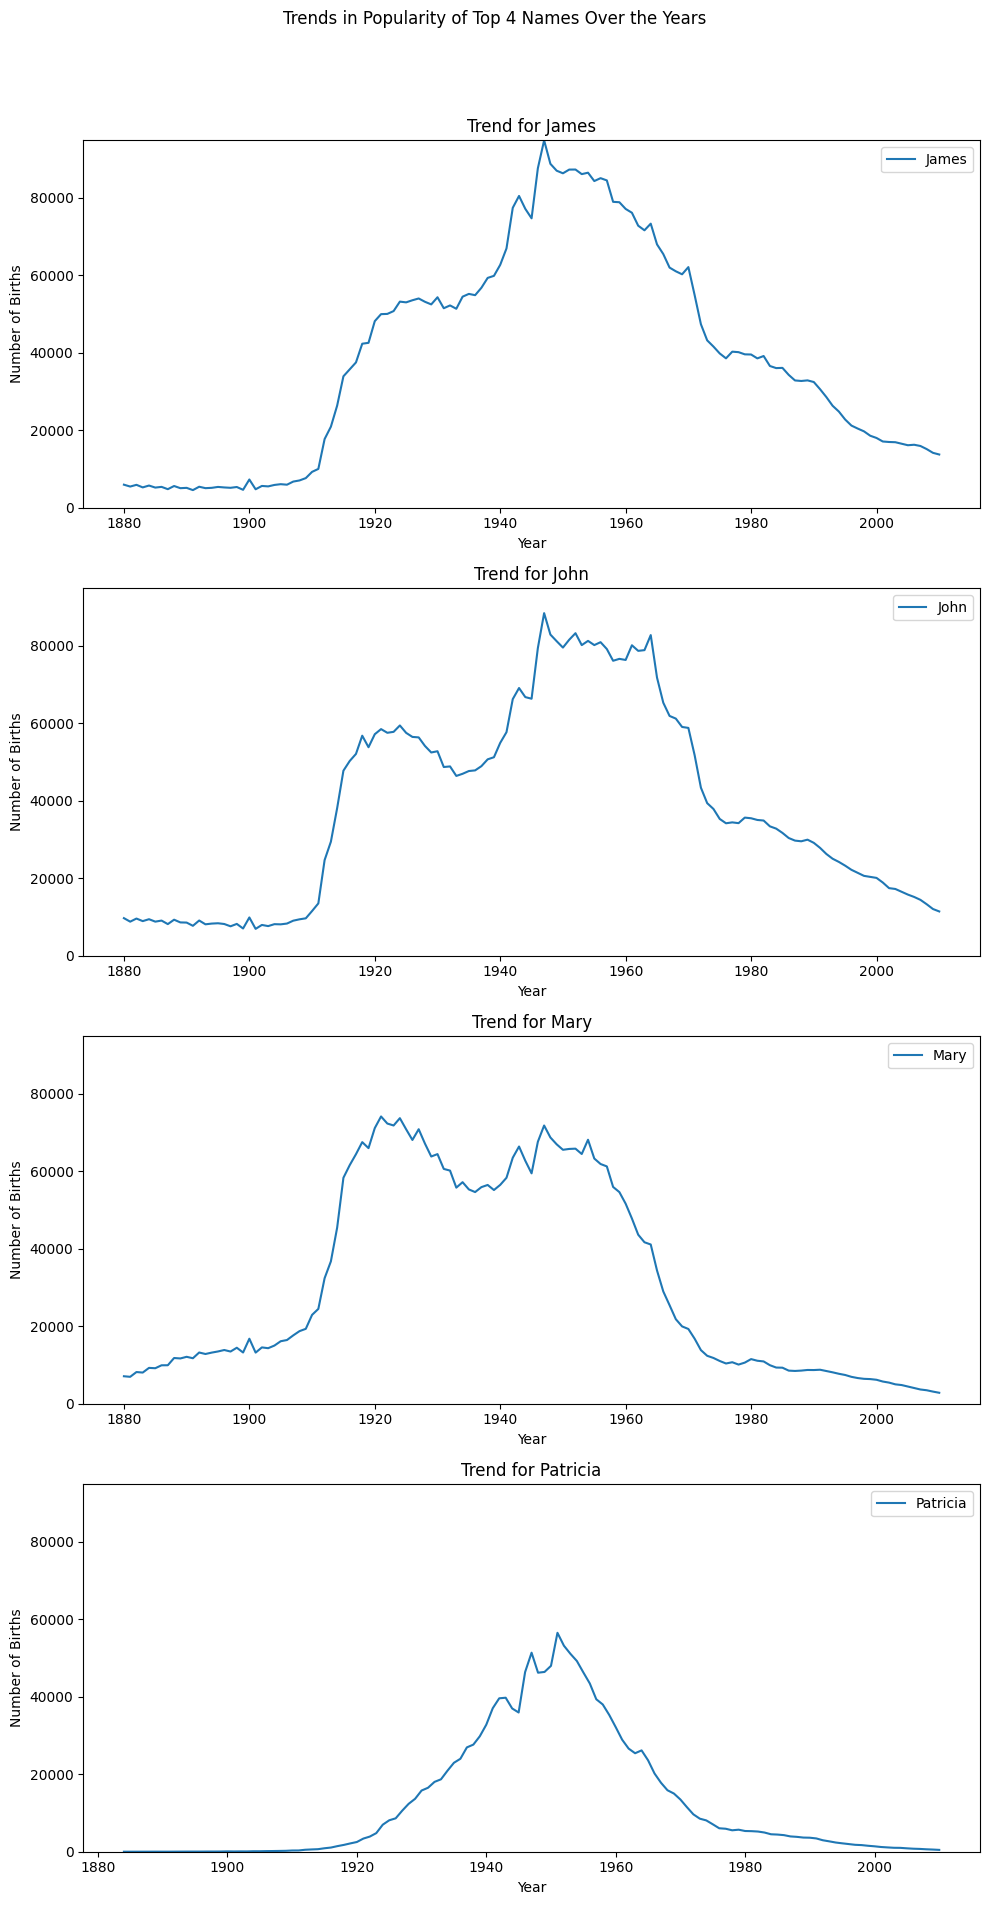

In [ ]:
popularity = babies.groupby(['name', 'sex'])['number'].sum().reset_index()

male_popularity = popularity[popularity['sex'] == 'M']
female_popularity = popularity[popularity['sex'] == 'F']

top_2_male = male_popularity.nlargest(2, 'number')
top_2_female = female_popularity.nlargest(2, 'number')

top_male_names = top_2_male['name'].tolist()
top_female_names = top_2_female['name'].tolist()


babies_top_names = {}
for name in top_male_names + top_female_names:
    babies_top_names[name] = babies[babies['name'] == name].groupby('year').sum().reset_index()


fig, axes = plt.subplots(4, 1, figsize=(10, 20))
fig.suptitle('Trends in Popularity of Top 4 Names Over the Years')

max_number = max([df['number'].max() for df in babies_top_names.values()])

for i, (name, df) in enumerate(babies_top_names.items()):
    axes[i].plot(df['year'], df['number'], label=name)
    axes[i].set_title(f'Trend for {name}')
    axes[i].set_ylabel('Number of Births')
    axes[i].set_xlabel('Year')
    axes[i].legend()
    axes[i].set_ylim(0, max_number)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Наблюдения по популярности имен
* Наблюдения относительно популярности имен James, John, Mary и Patricia:
* Для James: Популярность имени росла до середины 20 века, после чего достигла пика и начала постепенно убывать. Этот тренд может отражать культурные изменения и сдвиги в предпочтениях имен со временем.
* Для John: Имя также наблюдало взлет популярности до середины 20 века, за которым последовало снижение. Похоже, что пик популярности для John был несколько раньше, чем для James, и снижение было более резким.
* Для Mary: Это имя было чрезвычайно популярно в начале 20 века, но после середины века его популярность начала снижаться. Снижение продолжается до сегодняшнего дня, что может быть связано с разнообразием имен, доступных родителям в более поздние годы.
* Для Patricia: Популярность этого имени испытала резкий рост и пик в середине 20 века, после чего наступил еще более резкий спад. Возможно, что популярность Patricia была связана с конкретными культурными или медийными влияниями того времени, которые не оказали долгосрочного влияния на выбор имени.
* Эти тренды отражают общие культурные и социальные тенденции, которые влияют на популярность имен. Они также могут отражать влияние известных личностей, изменения в именовании и другие факторы, влияющие на родительский выбор имен для их детей.
